In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('classic')

In [24]:
def rate_of_change(q1,q2,q3,q4,L12,L23,L25,L34,L42,L45,LP): 
    dq1 = -(LP + L12)*q1
    dq2 = L12 * q1 - (LP + L25 + L23)*q2 + L42 * q4
    #cari nilai L42 * q4
    dq3 = L23 * q2 - (LP + L34)*q3
    dq4 = L34 * q3 - (LP + L42 + L45)*q4
    #cari nilai banyaknya pembuangan ekskresi dan looping
    return dq1,dq2,dq3,dq4

In [51]:
#Definisikan variabel
q1_0 = 1.110
q2_0 = 0
q3_0 = 0
q4_0 = 0 
LP = 0.693/(8.06)
L12 = 1
L23 = 0.30
L25 = 0.70
L34 = 1.0
L42 = 0.9
L45 = 0.1
dt = 0.01
t = 60

In [52]:
dq1, dq2, dq3, dq4 = rate_of_change(q1_0, q2_0, q3_0, q4_0, LP, L12, L23, L25, L34, L42, L45)

In [53]:
def propagate(q1, q2, q3, q4, L12, L23, L25, L34, L42, L45, LP, dt):
    dq1, dq2, dq3, dq4 = rate_of_change(q1, q2, q3, q4, L12, L23, L25, L34, L42, L45, LP)
    q1_t = q1 + dq1 * dt
    q2_t = q2 + dq2 * dt
    q3_t = q3 + dq3 * dt 
    q4_t = q4 + dq4 * dt 
    return q1_t, q2_t, q3_t, q4_t

In [54]:
time = np.linspace(0,10,int(t/dt)+1)

In [55]:
Ns = np.zeros((4,int(t/dt)+1))

In [56]:
Ns[:,0] = q1_0, q2_0, q3_0, q4_0

In [57]:
for i in range(int(t/dt)):
    Ns[:,i+1] = propagate(Ns[0,i],Ns[1,i],Ns[2,i],Ns[3,i], L12, L23, L25, L34, L42, L45, LP, dt)

Text(0.5, 0, 'time')

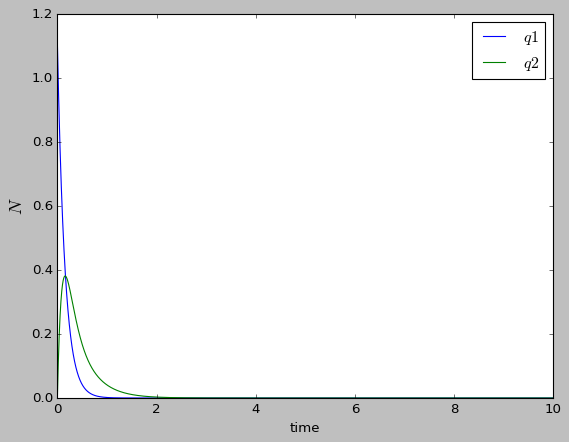

In [58]:
fig = plt.figure(figsize=(8,6))
plt.plot(time,Ns[0,:])
plt.plot(time,Ns[1,:])
#plt.plot(time,Ns[2,:])
#plt.plot(time,Ns[3,:])
plt.legend(('$q1$','$q2$'))
plt.ylabel('$N$',fontsize=16)
plt.xlabel('time')


Text(0.5, 0, 'time')

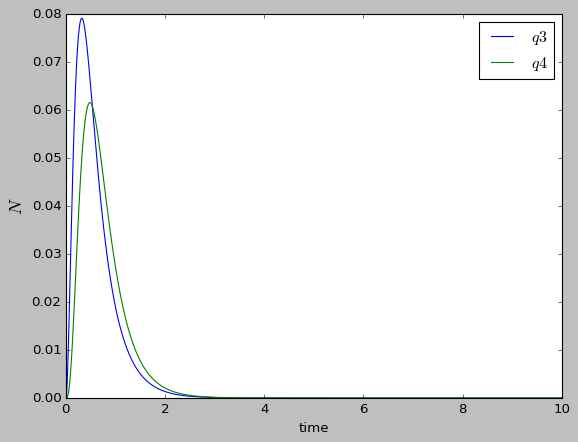

In [59]:
fig = plt.figure(figsize=(8,6))
#plt.plot(time,Ns[0,:])
#plt.plot(time,Ns[1,:])
plt.plot(time,Ns[2,:])
plt.plot(time,Ns[3,:])
plt.legend(('$q3$','$q4$'))
plt.ylabel('$N$',fontsize=16)
plt.xlabel('time')

q1 merupakan stomach
q2 merupakan body fluid
q3 merupakan thyroid
q4 merupakan whole body
cari tahu kenapa grafik gini karena ada nilai looping yang besar